#  Unsupervised - Clustering Algorithms

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/sujitcl/code/main/Data/useravg2018.csv', index_col=0)
dataset.head()

,USER_ID,AVG_PERC,MAX_PERC,TOP3_AVG,NMOCKS,ATT,OK,ACC,AVG_ATT
1,302344,62.063708,83.095410,80.68,12,636,427,67.14,53.000000
2,304203,95.452029,99.654278,98.91,5,379,281,74.14,75.800000
5,307798,57.080305,81.070345,65.56,5,258,165,63.95,51.600000
7,351294,49.714915,89.949537,75.48,13,790,445,56.33,60.769231
9,624217,50.327109,76.604507,65.43,7,309,203,65.70,44.142857


In [ ]:
dataset.describe().loc[['count', 'mean', 'min', 'std', 'max']]

,USER_ID,AVG_PERC,MAX_PERC,TOP3_AVG,NMOCKS,ATT,OK,ACC,AVG_ATT
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,1.472902e+06,62.943748,80.768828,75.486350,9.697500,561.232500,363.807500,64.122975,57.140308
min,3.023440e+05,16.367214,24.213554,22.410000,4.000000,145.000000,83.000000,50.000000,30.444444
std,3.157168e+05,19.552976,17.068313,18.841274,3.252297,226.536842,157.724198,6.930649,9.730095
max,1.945951e+06,99.512102,99.937840,99.860000,15.000000,1128.000000,780.000000,82.150000,85.000000


### Scale the data before applying Kmeans.

In [ ]:
##### Load the X variable  with columns ACC and AVG_ATT
X=dataset[['ACC', 'AVG_ATT']].values

In [ ]:
#Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Build the Elbow Curve

In [ ]:
from sklearn.cluster import KMeans
wcss = []
cl=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    cl.append(i)

Text(0.5, 1.0, 'The Elbow Method')

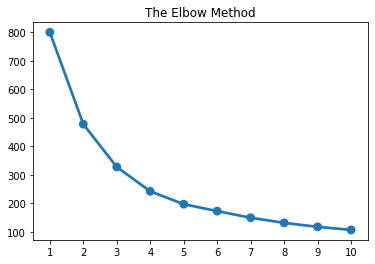

In [ ]:
sns.pointplot(x=cl, y=wcss)
plt.title('The Elbow Method')

## Generate clusters based on selected K (=5).

In [ ]:
# Fit the Algorithm and Predict
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_scaled)

In [ ]:
# assign the cluster number to the data.
dataset['cluster']= y_kmeans
dataset.head()

,USER_ID,AVG_PERC,MAX_PERC,TOP3_AVG,NMOCKS,ATT,OK,ACC,AVG_ATT,cluster
1,302344,62.063708,83.095410,80.68,12,636,427,67.14,53.000000,4
2,304203,95.452029,99.654278,98.91,5,379,281,74.14,75.800000,3
5,307798,57.080305,81.070345,65.56,5,258,165,63.95,51.600000,4
7,351294,49.714915,89.949537,75.48,13,790,445,56.33,60.769231,2
9,624217,50.327109,76.604507,65.43,7,309,203,65.70,44.142857,4


## Visualize the Clusters



#get the Centroids back unscaled
kmc = scaler.inverse_transform(kmeans.cluster_centers_)

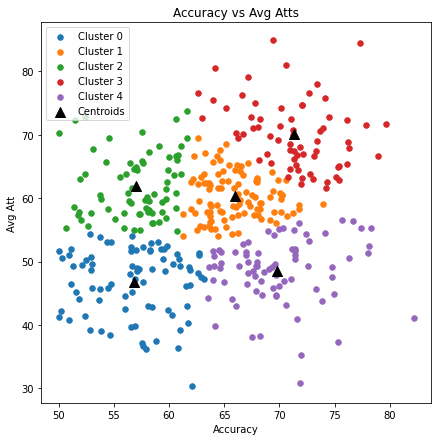

In [ ]:
# Plot the 5 clusters
plt.subplots(figsize=(7,7))

plt.scatter(dataset[dataset.cluster==0]['ACC'], dataset[dataset.cluster==0]['AVG_ATT'], 
            s=30, label='Cluster 0')
plt.scatter(dataset[dataset.cluster==1]['ACC'], dataset[dataset.cluster==1]['AVG_ATT'], 
            s=30, label='Cluster 1')
plt.scatter(dataset[dataset.cluster==2]['ACC'], dataset[dataset.cluster==2]['AVG_ATT'], 
            s=30, label='Cluster 2')
plt.scatter(dataset[dataset.cluster==3]['ACC'], dataset[dataset.cluster==3]['AVG_ATT'], 
            s=30, label='Cluster 3')
plt.scatter(dataset[dataset.cluster==4]['ACC'], dataset[dataset.cluster==4]['AVG_ATT'], 
            s=30, label='Cluster 4')

#Plot the Cluster Centroids. We need the centroids unscaled.
kmc = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(kmc[:,0], kmc[:,1], c='black', s=100, marker='^', label='Centroids')
plt.title('Accuracy vs Avg Atts')
plt.xlabel('Accuracy')
plt.ylabel('Avg Att')
plt.legend(loc=2)
plt.show()

In [ ]:
#intuition (two-dimension)
#  0 - Remedial, need help to improve att (46) and accuracy (56)
#  1 - Near Achievers, needs more attempts (60)
#  2 - Careless , High Att (61), low accuracy (56)
#  3 - Conservative - Good Acc (69), Too few attempts (48)
#  4 - High Achievers , with good acc (71) and att (70)

## Rename the Clusters Logically

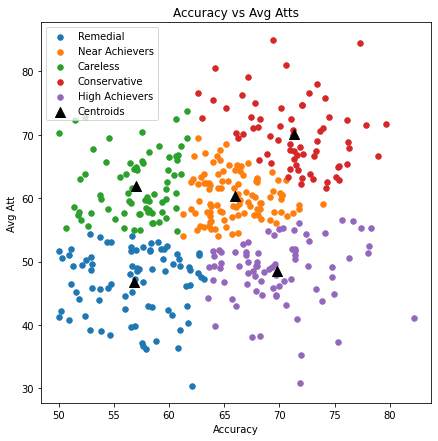

In [ ]:
plt.subplots(figsize=(7,7))

plt.scatter(dataset[dataset.cluster==0]['ACC'], dataset[dataset.cluster==0]['AVG_ATT'], 
            s=30, label='Remedial')
plt.scatter(dataset[dataset.cluster==1]['ACC'], dataset[dataset.cluster==1]['AVG_ATT'], 
            s=30, label='Near Achievers')
plt.scatter(dataset[dataset.cluster==2]['ACC'], dataset[dataset.cluster==2]['AVG_ATT'], 
            s=30, label='Careless')
plt.scatter(dataset[dataset.cluster==3]['ACC'], dataset[dataset.cluster==3]['AVG_ATT'], 
            s=30, label='Conservative')
plt.scatter(dataset[dataset.cluster==4]['ACC'], dataset[dataset.cluster==4]['AVG_ATT'], 
            s=30, label='High Achievers')

plt.scatter(kmc[:,0], kmc[:,1], s=100, c='black', marker='^', label='Centroids')
plt.title('Accuracy vs Avg Atts')
plt.xlabel('Accuracy')
plt.ylabel('Avg Att')
plt.legend(loc=2)
plt.show()

### Check the cluster average properties

In [ ]:
clusters = dataset.groupby('cluster')

In [ ]:
cldata = clusters[['ACC', 'AVG_ATT']].mean()
cldata

,ACC,AVG_ATT
cluster,,
0,56.805000,46.705698
1,65.982178,60.266925
2,56.998333,61.875983
3,71.328657,70.107743
4,69.795897,48.551371
